# What is probability? A simulated introduction

In [2]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

## Learning Objectives of Part 1

- To have an understanding of what "probability" means, in both Bayesian and Frequentist terms;
- To be able to simulate probability distributions that model real-world phenomena;
- To understand and be able to simulate joint probabilities and conditional probabilities;
- To understand Bayes' Theorem and its utility.

## 1. Probability

> To the pioneers such as Bernoulli, Bayes and Laplace, a probability represented a _degree-of-belief_ or plausibility; how much they thought that something was true, based on the evidence at hand. To the 19th century scholars, however, this seemed too vague and subjective an idea to be the basis of a rigorous mathematical theory. So they redefined probability as the _long-run relative frequency_ with which an event occurred, given (infinitely) many repeated (experimental) trials. Since frequencies can be measured, probability was now seen as an objective tool for dealing with _random_ phenomena.

-- _Data Analysis, A Bayesian Tutorial_, Sivia & Skilling (p. 9)

What type of random phenomena are we talking about here? One example is:

- Knowing that a website has a click-through rate (CTR) of 10%, we can calculate the probabilty of having 10 people, 9 people, 8 people ... and so on click through, upon drawing 10 people randomly from the population;
- But given the data of how many people click through, how can we calculate the CTR? And how certain can we be of this CTR? Or how likely is a particular CTR?

Science mostly asks questions of the second form above & Bayesian thinking provides a wondereful framework for answering such questions. Essentially Bayes' Theorem gives us a way of moving from the probability of the data given the model (written as $P(data|model)$) to the probability of the model given the data ($P(model|data)$).

We'll first explore questions of the 1st type using simulation: knowing the model, what is the probability of seeing certain data?

## 2. Simulating probabilities

* Let's say that a website has a CTR of 50%, i.e. that 50% of people click through. If we picked 1000 people at random from thepopulation, how likely would it be to find that a certain number of people click?

We can simulate this using `numpy`'s random number generator.

To do so, first note we can use `np.random.rand()` to randomly select floats between 0 and 1 (known as the _uniform distribution_). Below, we do so and plot a histogram:

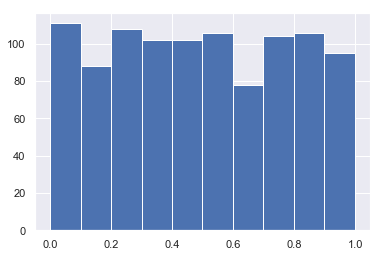

In [4]:
# Draw 1,000 samples from uniform & plot results
x = np.random.rand(1000)
plt.hist(x);

To then simulate the sampling from the population, we check whether each float was greater or less than 0.5. If less than or equal to 0.5, we say the person clicked.

In [5]:
# Computed how many people click
clicks = x <= 0.5
n_clicks = sum(clicks)
f"Number of clicks = {n_clicks}"

'Number of clicks = 511'

The proportion of people who clicked can be calculated as the total number of clicks over the number of people:

In [6]:
# Computed proportion of people who clicked
f"Proportion who clicked = {n_clicks/len(clicks)}"

'Proportion who clicked = 0.511'

**Discussion**: Did you get the same answer as your neighbour? If you did, why? If not, why not?

**Up for discussion:** Let's say that all you had was this data and you wanted to figure out the CTR (probability of clicking). 

* What would your estimate be?
* Bonus points: how confident would you be of your estimate?

**Note:** Although, in the above, we have described _probability_ in two ways, we have not described it mathematically. We're not going to do so rigorously here, but we will say that _probabilty_ defines a function from the space of possibilities (in the above, the interval $[0,1]$) that describes how likely it is to get a particular point or region in that space. Mike Betancourt has an elegant [Introduction to Probability Theory (For Scientists and Engineers)](https://betanalpha.github.io/assets/case_studies/probability_theory.html) that I can recommend.

### Hands-on: more clicking

Use random sampling to simulate how many people click when the CTR is 0.7. How many click? What proportion?

In [7]:
# Solution
clicks = x <= 0.7
n_clicks = sum(clicks)
print(f"Number of clicks = {n_clicks}")
print(f"Proportion who clicked = {n_clicks/len(clicks)}")

Number of clicks = 695
Proportion who clicked = 0.695


_Discussion point_: This model is know as the bias coin flip. 
- Can you see why?
- Can it be used to model other phenomena?

### Galapagos finch beaks

You can also calculate such proportions with real-world data. Here we import a dataset of Finch beak measurements from the Galápagos islands. You can find the data [here](https://datadryad.org/resource/doi:10.5061/dryad.9gh90).

In [8]:
# Import and view head of data
df_12 = pd.read_csv('../data/finch_beaks_2012.csv')
df_12.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [9]:
# Store lengths in a pandas series
lengths = df_12['blength']

* What proportion of birds have a beak length > 10 ?

In [10]:
p = (sum(lengths > 10))/len(lengths)
p

0.8514056224899599

**Note:** This is the proportion of birds that have beak length $>10$ in your empirical data, not the probability that any bird drawn from the population will have beak length $>10$.

### A proxy for probability

As stated above, we have calculated a proportion, not a probability. As a proxy for the probability, we can simulate drawing random samples (with replacement) from the data seeing how many lengths are > 10 and calculating the proportion (commonly referred to as [hacker statistics](https://speakerdeck.com/jakevdp/statistics-for-hackers)):

In [11]:
n_samples = 10000
sum(np.random.choice(lengths, n_samples, replace=True) > 10)/n_samples

0.8515

### Another way to simulate coin-flips

In the above, you have used the uniform distribution to sample from a series of biased coin flips. I want to introduce you to another distribution that you can also use to do so: the **binomial distribution**.

The **binomial distribution** with parameters $n$ and $p$ is defined as the probability distribution of

> the number of heads seen when flipping a coin $n$ times when  with $p(heads)=p$.

**Note** that this distribution essentially tells the _story_ of a general model in the following sense: if we believe that they underlying process generating the observed data has a binary outcome (affected by disease or not, head or not, 0 or 1, clicked through or not), and that one the of the two outcomes occurs with probability $p$, then the probability of seeing a particular outcome is given by the **binomial distribution** with parameters $n$ and $p$.

Any process that matches the coin flip story is a Binomial process.

We'll now use the binomial distribution to answer the same question as above:
* If P(heads) = 0.7 and you flip the coin ten times, how many heads will come up?

We'll also set the seed to ensure reproducible results.

In [12]:
# Set seed
np.random.seed(seed=16071982)

# Simulate one run of flipping the biased coin 10 times
np.random.binomial(10, 0.7)

7

### Simulating many times to get the distribution

In the above, we have simulated the scenario once. But this only tells us one potential outcome. To see how likely it is to get $n$ heads, for example, we need to simulate it a lot of times and check what proportion ended up with $n$ heads.

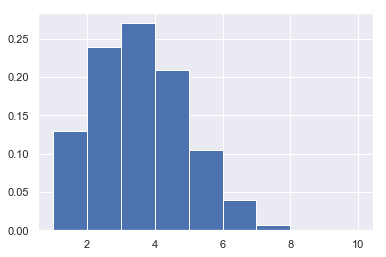

In [13]:
# Simulate 1,000 run of flipping the biased coin 10 times
x = np.random.binomial(10, 0.3, 10000)

# Plot normalized histogram of results
plt.hist(x, density=True, bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]);

* Group chat: what do you see in the above?

## Hands-on

- If I flip a biased coin ($P(H)=0.3$) 20 times, what is the probability of 5 or more heads?

In [14]:
# Solution
sum(np.random.binomial(20, 0.3, 10000) >= 5)/10000

0.7613

- If I flip a fair coin 20 times, what is the probability of 5 or more heads?

In [15]:
sum(np.random.binomial(20,0.5,10000) >= 5)/10000

0.994

- Plot the normalized histogram of number of heads of the following experiment: flipping a fair coin 10 times.

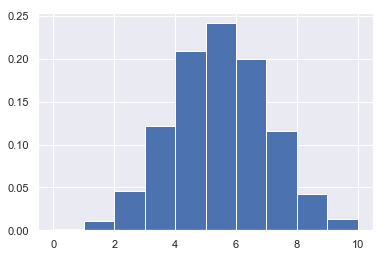

In [16]:
# Plot histogram 
x = np.random.binomial(10, 0.5, 10000)
plt.hist(x, density=True);

**Note:** you may have noticed that the _binomial distribution_ can take on only  a finite number of values, whereas the _uniform distribution_ above can take on any number between $0$ and $1$. These are different enough cases to warrant special mention of this & two different names: the former is called a _probability mass function_ (PMF) and the latter a _probability distribution function_ (PDF). Time permitting, we may discuss some of the subtleties here. If not, all good texts will cover this. I like (Sivia & Skilling, 2006), among many others.


**Question:** 
* Looking at the histogram, can you tell me the probability of seeing 4 or more heads?

### Empirical cumulative distribution functions

* TO ADD: ECDFs (motivate: what's the probability of seeing 6 or more heads?)

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

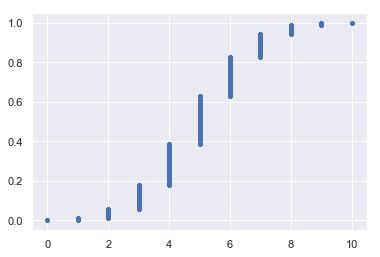

In [17]:
x_flips, y_flips = ecdf(x)
plt.plot(x_flips, y_flips, marker='.', linestyle='none')

### Poisson processes and the Poisson distribution

In his great book on information theory, statistical inference, and machine learning, David MacKay described a town called Poissonville where the buses have a very erratic schedule. If you stand at a bus stop in Poissonville, the amount of time you have to wait for a bus is completely independent of when the previous bus arrived. In other words, you would watch a bus drive off and another one will arrive almost instantly, or you could be waiting for hours.

Arrival of buses in Poissonville is what we call a Poisson process. The timing of the next event is completely independent of when the previous event happened. Many real-life processes behave in this way. 

* natural births in a given hospital tThere is a well-defined average number of natural births per year, and the timing of one birth is independent of the timing of the previous one);
* landings on a website;
* Meteor strikes;
* Molecular collisions in a gas;
* Aviation incidents;
* Buses in  Poissonville.

Any process that matches the buses in Poissonville story is a Poisson process.

    

The number of arrivals of a Poisson process in a given amount of time is Poisson distributed. The Poisson distribution has one parameter, the average number of arrivals in a given length of time. So, to match the story, we could consider the number of hits on a website in an hour with an average of six hits per hour. This is Poisson distributed.

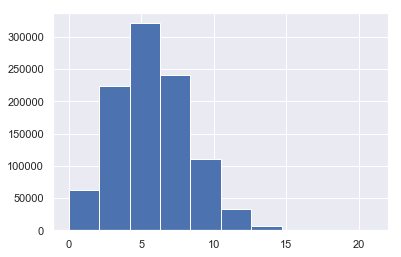

In [27]:
samples  =  np.random.poisson(6, size=10**6)
plt.hist(samples);

Does this look like anything to you??

This is because the Poisson distribution is a limit of the Binomial distribution for low probability of success and large number of trials, ie for rare events. 

> You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

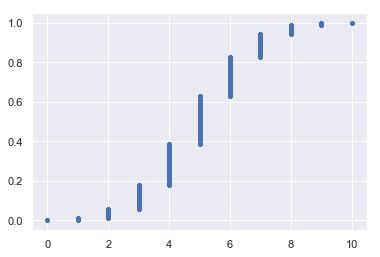

In [26]:
x_p, y_p = ecdf(samples)
plt.plot(x_flips, y_flips, marker='.', linestyle='none')

### No hitters

In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/thinking-probabilistically-discrete-variables?ex=15

## Example Poisson distribution: field goals attempted per game

This section is taken from the great work of my main man Justin Bois! From here: https://github.com/justinbois/dataframed-plot-examples/blob/master/lebron_field_goals.ipynb

The story behind the Poisson distribution is as follows.
> The number of arrivals of a Poisson processes in a given set time interval is Poisson distributed.
We could model field goal attempts in a basketball game using a Poisson distribution. When a player takes a shot is a largely stochastic process, being influenced by the myriad ebbs and flows of a basketball game. Some players shoot more than others, though, so there is a well-defined rate of shooting. Let's consider LeBron James's field goal attempts for the 2017-2018 NBA season. First, the data.

In [47]:
fga = [19, 16, 15, 20, 20, 11, 15, 22, 34, 17, 20, 24, 14, 14, 
       24, 26, 14, 17, 20, 23, 16, 11, 22, 15, 18, 22, 23, 13, 
       18, 15, 23, 22, 23, 18, 17, 22, 17, 15, 23, 8, 16, 25, 
       18, 16, 17, 23, 17, 15, 20, 21, 10, 17, 22, 20, 20, 23, 
       17, 18, 16, 25, 25, 24, 19, 17, 25, 20, 20, 14, 25, 26, 
       29, 19, 16, 19, 18, 26, 24, 21, 14, 20, 29, 16, 9]

To show that this random variable is approximately Poisson distributed, we will plot its empirical cumulative distribution function (ECDF) and compare it with the maximum likelihood estimate for the ECDF of the Poisson distribution. First, we'll generate the x and y values for the ECDF.

In [48]:
x_ecdf, y_ecdf = ecdf(fga)

Next, we will draw many samples out of a Poisson distribution to get the theoretical ECDF.

In [49]:
n_reps = 1000
x_theor = np.concatenate([np.sort(np.random.poisson(np.mean(fga), size=len(fga))) 
                               for _ in range(n_reps)])
y_theor = np.concatenate([y_ecdf]*n_reps)

Now let's build the plot!

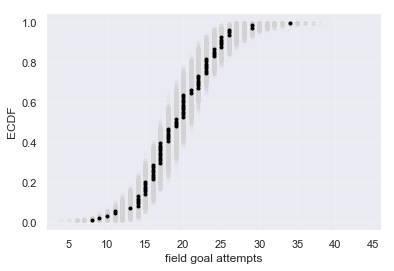

In [50]:
# Set up axes
fig, ax = plt.subplots()
ax.grid(color='#eeeeee')
ax.set_xlabel('field goal attempts')
ax.set_ylabel('ECDF')

ax.plot(x_theor, y_theor, '.', alpha=0.01, color='lightgray');
ax.plot(x_ecdf, y_ecdf, '.', color='black');

Indeed, LeBron's field goal attempts per game are Poisson distributed!

## Exponential distribution

> Just as there are many named discrete distribution, there are many named continuous distributions as well. For example, let's take a another trip to Poissonville and stand at a bus stop. We know that the number of buses that will arrive per hour are Poisson distributed. But the amount of time between arrivals of buses are Exponentially distributed.
The Exponential distribution has this story: the waiting time between arrivals of a Poisson process are exponentially distributed. It has a single parameter, the mean waiting time. This distribution is not peaked, as we can see from its PDF.
As an example, we can look at the time between all incidents involving nuclear power since 1974. We might expect incidents to be well-modeled by a Poisson process, ie, the timing of one incident is independent of all others. So, the time between incidents should be Exponentially distributed.
We can compute and plot the CDF we would expect based on the mean time between incidents and overlay that with the ECDF from the real data. We take our usual approach where we draw many samples out of the Exponential distribution, using the mean inter-incident time as the parameter. We make the plot and label the axes.
We see that it is close to being Exponentially distributed, indicating the nuclear incidents can indeed be modeled as a Poisson process.

**Question:**
How might we expect the time between Major League no-hitters to be distributed? Be careful here: we are looking at the probability distribution of the time between no hitters, not the probability distribution for the number of no-hitters in a season.

**HBA:** Interincident time -- https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/thinking-probabilistically-continuous-variables?ex=11

In [4]:
df = pd.read_csv('../data/nuclear_power_accidents.csv')
df.Date = pd.to_datetime(df.Date)
df = df[df.Date >= pd.to_datetime('1974-01-01')]

inter_times = np.diff(np.sort(df.Date)).astype(float) / 1e9 / 3600 / 24

In [6]:
mean = np.mean(inter_times)
samples = np.random.exponential(mean, size=10**6)
x, y = ecdf(inter_times)
x_theor, y_theor = ecdf(samples)

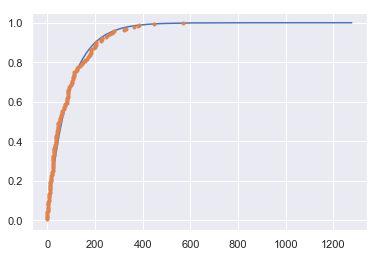

In [9]:
plt.plot(x_theor, y_theor);
plt.plot(x, y, marker='.', linestyle='none');

### Normal distribution

Some words about the normal/Gaussian distribution.  

> Laplace found that any sum or mean of measurements will be approximately Normally distributed if there are many measurements.

>  Each measurement is the result of many processes. In the astronomical case, you have all of the optical components, distortions due to the atmosphere, the experimenter, etc. The sum of all of these can give Normally distributed errors.

From here: https://docs.google.com/document/d/1-numE7bbN2pGXCt1ai3hqRx_M9SPJ0BYBZjT7025Brg/edit


Image of German currency. Then:

In [32]:
df = pd.read_csv('../data/michelson_speed_of_light.csv')
df = df.rename(columns={'velocity of light in air (km/s)': 'c'})

Text(0, 0.5, 'PDF')

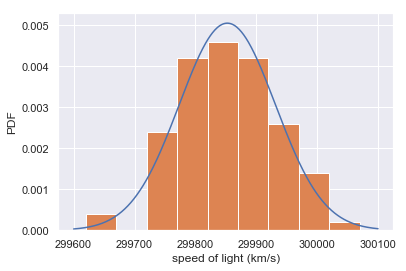

In [45]:
import scipy.stats as st

c = df.c.values
x_s = np.linspace(299.6, 300.1, 400) * 1000


plt.plot(x_s, st.norm.pdf(x_s, c.mean(), c.std(ddof=1)))

plt.hist(c, bins=9, density=True)
plt.xlabel('speed of light (km/s)')
plt.ylabel('PDF')

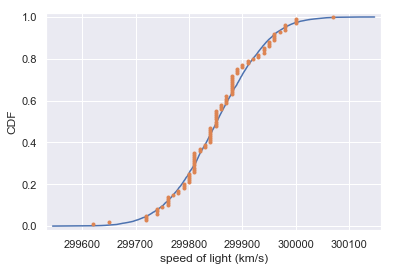

In [33]:
michelson_speed_of_light = df.c.values
mean = np.mean(michelson_speed_of_light)

std = np.std(michelson_speed_of_light, ddof=1)
samples = np.random.normal(mean, std, size=10000)

x, y = ecdf(michelson_speed_of_light)

x_theor, y_theor = ecdf(samples)

_ = plt.plot(x_theor, y_theor)

_ = plt.plot(x, y, marker='.', linestyle='none')

_ = plt.xlabel('speed of light (km/s)')

_ = plt.ylabel('CDF')

plt.margins(0.02)

# PROBABILITY DISTRIBUTIONS AND THEIR STORIES

## 3. Joint Probability & Conditional Probability

### Joint Probability

We have already encountered joint probabilities above, perhaps without knowing it: $P(A,B)$ is the probability two events $A$ and $B$ _both_ occurring.
* For example, getting two heads in a row.

If $A$ and $B$ are independent, then $P(A,B)=P(A)P(B)$ but be warned: this is not always (or often) the case.

One way to think of this is considering "AND" as multiplication: the probability of A **and** B is the probability of A **multiplied** by the probability of B.

### HANDS-ON: JOINT PROBABILITY COIN FLIPPING

Verify that $P(A,B)=P(A)P(B)$ in the two fair coin-flip case (A=heads, B=heads) by 
- first simulating two coins being flipped together and calculating the proportion of occurences with two heads;
- then simulating one coin flip and calculating the proportion of heads and then doing that again and multiplying the two proportions.

Your two calculations should give "pretty close" results and not the same results due to the (in)accuracy of simulation. 

0.2503


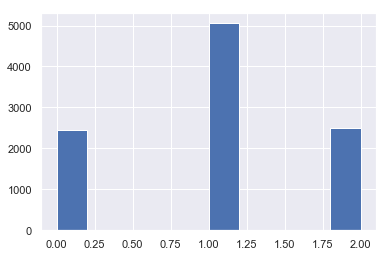

In [15]:
# Solution: Calculate P(A,B)
x_0 = np.random.binomial(2, 0.5, 10000)
p_ab = sum(x_0==2)/len(x_0)
plt.hist(x_0);
print(p_ab)

In [16]:
# Solution: Calculate P(A)P(B)
x_1 = np.random.binomial(1, 0.5, 10000)
x_2 = np.random.binomial(1, 0.5, 10000)
p_a = sum(x_1 == 1)/len(x_1)
p_b = sum(x_2 == 1)/len(x_2)
p_a*p_b

0.25024406000000005

**Note:** In order to use such simulation and _hacker statistics_ approaches to "prove" results such as the above, we're gliding over several coupled and deep technicalities. This is in the interests of the pedagogical nature of this introduction. For the sake of completeness, we'll mention that we're essentially
- Using the proportion in our simulations as a proxy for the probability (which, although Frequentist, is useful to allow you to start getting your hands dirty with probability via simluation).

Having stated this, for ease of instruction, we'll continue to do so when thinking about joint & conditional probabilities of both simulated and real data. 

### HANDS-ON: joint probability for birds

What is the probability that two randomly selected birds have beak depths over 10 ?

In [17]:
# Calculate P(A)P(B) of two birds having beak lengths > 10
p_a = (sum(lengths > 10))/len(lengths)
p_b = (sum(lengths > 10))/len(lengths)
p_a*p_b

0.724891534007516

* Calculate the joint probability using the resampling method, that is, by drawing random samples (with replacement) from the data. First calculate $P(A)P(B)$:

In [18]:
# Calculate P(A)P(B) using resampling methods
n_samples = 100000
p_a = sum(np.random.choice(lengths, n_samples, replace=True) > 10)/n_samples
p_b = sum(np.random.choice(lengths, n_samples, replace=True) > 10)/n_samples
p_a*p_b

0.7238861042000001

Now calculate $P(A,B)$:

In [19]:
# Calculate P(A,B) using resampling methods
n_samples = 100000
samples = np.random.choice(lengths, (n_samples,2), replace=True)
_ = samples > (10, 10)
p_ab = sum(np.prod(_, axis=1))/n_samples
p_ab

0.72493

**Task:** Interpret the results of your simulations.

### Conditional Probability

Now that we have a grasp on joint probabilities, lets consider conditional probabilities, that is, the probability of some $A$, knowing that some other $B$ is true. We use the notation $P(A|B)$ to denote this. For example, you can ask the question "What is the probability of a finch beak having depth $<10$, knowing that the finch of of species 'fortis'?"

#### Example: conditional probability for birds

1. What is the probability of a finch beak having depth > 10 ?
2. What if we know the finch is of species 'fortis'?
3. What if we know the finch is of species 'scandens'?

In [20]:
sum(df_12.blength > 10)/len(df_12)

0.8514056224899599

In [21]:
df_fortis = df_12.loc[df_12['species'] == 'fortis']
sum(df_fortis.blength > 10)/len(df_fortis)

0.6942148760330579

In [22]:
df_scandens = df_12.loc[df_12['species'] == 'scandens']
sum(df_scandens.blength > 10)/len(df_scandens)

1.0

**Note:** These proportions are definitely different. We can't say much more currently but we'll soon see how to use hypothesis testing to see what else we can say about the differences between the species of finches.

### Joint and conditional probabilities

Conditional and joint probabilites are related by the following:
$$ P(A,B) = P(A|B)P(B)$$

**Homework exercise for the avid learner:** verify the above relationship using simulation/resampling techniques in one of the cases above.

### Hands on example: drug testing

**Question:** Suppose that a test for using a particular drug is 99% sensitive and 99% specific. That is, the test will produce 99% true positive results for drug users and 99% true negative results for non-drug users. Suppose that 0.5% (5 in 1,000) of people are users of the drug. What is the probability that a randomly selected individual with a positive test is a drug user?

**If we can answer this, it will be really cool as it shows how we can move from knowing $P(+|user)$ to $P(user|+)$, a MVP for being able to move from $P(data|model)$ to $P(model|data)$.**

In the spirit of this workshop, it's now time to harness your computational power and the intuition of simulation to solve this drug testing example. 

* Before doing so, what do you think the answer to the question _"What is the probability that a randomly selected individual with a positive test is a drug user?"_ is? Write down your guess.

In [24]:
# Take 10,000 subjects
n = 100000
# Sample for number of users, non-users
users = np.random.binomial(n, 0.005, 1) 
non_users = n - users

In [25]:
# How many of these users tested +ve ?
u_pos = np.random.binomial(users, 0.99)
# How many of these non-users tested +ve ?
non_pos = np.random.binomial(non_users, 0.01)

In [26]:
# how many of those +ve tests were for users?
u_pos/(u_pos+non_pos)

array([0.31377899])

**Discussion**: What you have been able to do here is to solve the following problem: you knew $P(+|user)=0.99$, but you were trying to figure out $P(user|+)$. Is the answer what you expected? If not, why not?

**Key note:** This is related to the serious scientific challenge posed at the beginning here: if you know the underlying parameters/model, you can figure out the distribution and the result, but often we have only the experimental result and we're trying to figure out the most appropriate model and parameters.

It is Bayes' Theorem that lets us move between these.

## 4. Bayes' Theorem

$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$$

As you may have guessed, it is Bayes' Theorem that will allow us to move back and forth between $P(data|model)$ and $P(model|data)$. As we have seen, $P(model|data)$ is usually what we're interested in as data scientists yet $P(data|model)$ is what we can easily compute, either by simulating our model or using analytic equations.

**One of the coolest things:** Bayes Theorem can be proved with a few lines of mathematics. Your instructor will do this on the chalk/white-board now.

### Bayes Theorem solves the above drug testing problem

Bayes Theorem can be used to analytically derive the solution to the 'drug testing' example above as follows.

From Bayes Theorem, 

$$P(user|+) = \frac{P(+|user)P(user)}{P(+)}$$



We can expand the denominator here into 

$$P(+)  = P(+,user) + P(+,non-user) $$

so that

$$ P(+)=P(+|user)P(user) + P(+|non-user)P(non-user)$$

and 

$$P(user|+) = \frac{P(+|user)P(user)}{P(+|user)P(user) + P(+|non-user)P(non-user)}$$.

Calculating this explicitly yields

$$P(user|+) = \frac{0.99\times 0.005}{0.99\times 0.005 + 0.01\times 0.995} = 0.332 $$

This means that if an individual tests positive, there is still only a 33.2% chance that they are a user! This is because the number of non-users is so high compared to the number of users.

Coming up: from Bayes Theorem to Bayesian Inference!